# Chapter 3

So far in this chapter, the book has discussed installing Keras and how it interfaces with the chosen backend (tensorflow, cntk, theano, etc..). The first applicable part of this chapter is section 3.4 where we will use the IMBD dataset to predict reviews for movies. The dataset is a part of the Keras library and contains 50,000 highly polarized reviews according to the book. The num_words argument in line 3 basically means that only the top 10,000 most commonly used words will be kept in the training and test data.

In [25]:
from tensorflow.keras.datasets import imdb

In [26]:
import numpy as np

In [27]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Example of decoding the training data back to human readble stuff

Pretty self-explanitory. the ?s represent data not included in the aforementioned 10,000 word dictionary.

In [28]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Preparing the data

So as we learned in last chapter, we cannot directly import vector data of essentially aarbitrary values into a neural network. I mean, we can, but it would seriously impede performance. To combat this, we _normalize_ the data. In this instance, normalization is done by one-hot encoding. Below is a manual implementation of one-hot encoding taken directly from the book. Based on my **limited** understanding: one-hot encoding takes each element in the array and encodes it in a way that makes the data understandable to neural networks.

In [29]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [30]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### A deeper dive

So I printed out the first few elements of the enumeration that takes place to get a bit of a deeper understanding of what's happening inside of the one-hot function. Based on what I can tell, the results matrix has a shape in dimension 0 equal to the length of the training data array and a shape in dimension 1 equal to the shape of the word dictionary. The results line inside of the for loop does the ineresting bit: for each line in the results array, every position that indicates a word that appears in the article, no matter how many times, is given a value of 1 and all others are given a value of 0.

In [31]:
print(list(enumerate(train_data[:2])))

[(0, [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]), (1, [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 43

### Another way embraces us

Instead of one-hot, you can use built in numpy functions to vectorize the data. But what fun is that?

In [32]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(train_labels).astype('float32')

### Building the network

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [36]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [37]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 104us/sample - loss: 0.5004 - accuracy: 0.7872 - val_loss: 0.3676 - val_accuracy: 0.8755
Epoch 2/20
15000/15000 [==============================] - 1s 42us/sample - loss: 0.2932 - accuracy: 0.9044 - val_loss: 0.2990 - val_accuracy: 0.8878
Epoch 3/20
15000/15000 [==============================] - 1s 44us/sample - loss: 0.2156 - accuracy: 0.9300 - val_loss: 0.2776 - val_accuracy: 0.8916
Epoch 4/20
15000/15000 [==============================] - 1s 46us/sample - loss: 0.1694 - accuracy: 0.9459 - val_loss: 0.2815 - val_accuracy: 0.8891
Epoch 5/20
15000/15000 [==============================] - 1s 46us/sample - loss: 0.1400 - accuracy: 0.9556 - val_loss: 0.2931 - val_accuracy: 0.8847
Epoch 6/20
15000/15000 [==============================] - 1s 50us/sample - loss: 0.1135 - accuracy: 0.9653 - val_loss: 0.2990 - val_accuracy: 0.8840
Epoch 7/20
15000/15000 [==============================]

In [38]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [39]:
import matplotlib.pyplot as plt

In [40]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

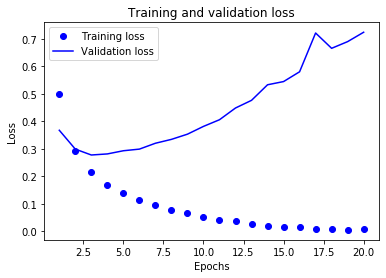

In [41]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

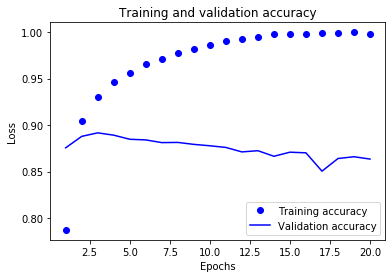

In [42]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [45]:
history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 1s 38us/sample - loss: 0.4205 - accuracy: 0.8228
Epoch 2/4
25000/25000 [==============================] - 1s 26us/sample - loss: 0.2332 - accuracy: 0.9133
Epoch 3/4
25000/25000 [==============================] - 1s 26us/sample - loss: 0.1787 - accuracy: 0.9341
Epoch 4/4
25000/25000 [==============================] - 2s 62us/sample - loss: 2.0150 - accuracy: 0.4994


## A mutliclass classification example

In the previous example, we learned how to classify our inputs into two distinct classes. While this is great as a starting point, sometimes we might want to extract more than two classes. In this section of the chapter, we will use the Reuters dataset to classify Reutures newswires into 46 distinct categories. This is an example of _single-label, multi-class classification_. Meaning every datapoint will fall into one and only one category of the 46 that we define in the output layer.

In [46]:
from tensorflow.keras.datasets import reuters

In [47]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [48]:
len(train_data)

8982

In [49]:
len(test_data)

2246

In [50]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [51]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [52]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Preparing the data

In [53]:
import numpy as np

In [68]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [55]:
x_train = vectorize_sequences(train_data)

In [56]:
x_test = vectorize_sequences(test_data)

In [69]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [58]:
one_hot_train_labels = to_one_hot(train_labels)

In [59]:
one_hot_test_labels = to_one_hot(test_labels)

### Building the network

In [70]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [71]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [72]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [73]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 76us/sample - loss: 2.6756 - accuracy: 0.5256 - val_loss: 1.7054 - val_accuracy: 0.6590
Epoch 2/20
7982/7982 [==============================] - 0s 32us/sample - loss: 1.3855 - accuracy: 0.7162 - val_loss: 1.2727 - val_accuracy: 0.7290
Epoch 3/20
7982/7982 [==============================] - 0s 31us/sample - loss: 1.0189 - accuracy: 0.7798 - val_loss: 1.1206 - val_accuracy: 0.7460
Epoch 4/20
7982/7982 [==============================] - 0s 30us/sample - loss: 0.8050 - accuracy: 0.8260 - val_loss: 1.0097 - val_accuracy: 0.7850
Epoch 5/20
7982/7982 [==============================] - 0s 30us/sample - loss: 0.6380 - accuracy: 0.8661 - val_loss: 0.9525 - val_accuracy: 0.8100
Epoch 6/20
7982/7982 [==============================] - 0s 30us/sample - loss: 0.5104 - accuracy: 0.8934 - val_loss: 0.9316 - val_accuracy: 0.8000
Epoch 7/20
7982/7982 [==============================] - 0s 31us/sample

In [79]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [80]:
epochs = range(1, len(loss) + 1)

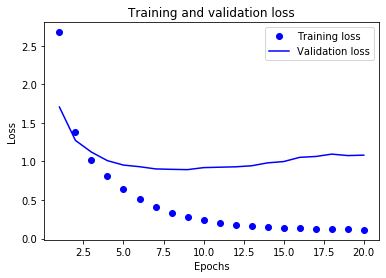

In [81]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

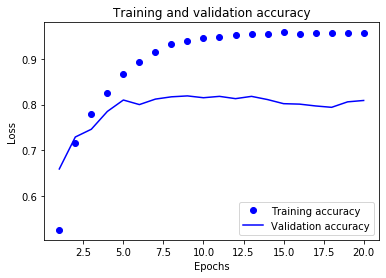

In [86]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### The model begins to overfit after nine epochs

In [88]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [89]:
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 76us/sample - loss: 2.5060 - accuracy: 0.4721 - val_loss: 1.6689 - val_accuracy: 0.6480
Epoch 2/9
7982/7982 [==============================] - 0s 31us/sample - loss: 1.3767 - accuracy: 0.7111 - val_loss: 1.2911 - val_accuracy: 0.7130
Epoch 3/9
7982/7982 [==============================] - 0s 30us/sample - loss: 1.0312 - accuracy: 0.7777 - val_loss: 1.1206 - val_accuracy: 0.7660
Epoch 4/9
7982/7982 [==============================] - 0s 30us/sample - loss: 0.8142 - accuracy: 0.8281 - val_loss: 1.0454 - val_accuracy: 0.7740
Epoch 5/9
7982/7982 [==============================] - 0s 30us/sample - loss: 0.6505 - accuracy: 0.8623 - val_loss: 0.9845 - val_accuracy: 0.7840
Epoch 6/9
7982/7982 [==============================] - 0s 32us/sample - loss: 0.5216 - accuracy: 0.8908 - val_loss: 0.9460 - val_accuracy: 0.8090
Epoch 7/9
7982/7982 [==============================] - 0s 31us/sample - loss

In [90]:
import copy

In [91]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18432769367764915

In [92]:
predictions = model.predict(x_test)